In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,roc_curve, accuracy_score

## Problem 1 : Clustering
A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.




## Data Dictionary for Market Segmentation:
1.spending: Amount spent by the customer per month (in 1000s)

2.advance_payments: Amount paid by the customer in advance by cash (in 100s)

3.probability_of_full_payment: Probability of payment done in full by the customer to the bank

4.current_balance: Balance amount left in the account to make purchases (in 1000s)

5.credit_limit: Limit of the amount in credit card (10000s)

6.min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)

7.max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)



1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [2]:
df = pd.read_csv("C:/Users/212548638/Desktop/GL/Project 3 DM/PROJECT/bank_marketing_part1_Data.csv")

In [3]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
df.tail()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

Observation: 

7 variables and 210 records.

No missing record based on initial analysis.

All the variables numeric type.

No duplicate rows found

## Univariate analysis

In [8]:
# CHECKING FIVE POINT SUMMARY
# CHECKING DISTRIBUTION OF VARIABLES
# CHECKING OUTLIERS

In [9]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=True, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()
    

In [10]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

7

Description of spending
----------------------------------------------------------------------------
count    210.000000
mean      14.847524
std        2.909699
min       10.590000
25%       12.270000
50%       14.355000
75%       17.305000
max       21.180000
Name: spending, dtype: float64 Distribution of spending
----------------------------------------------------------------------------


C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


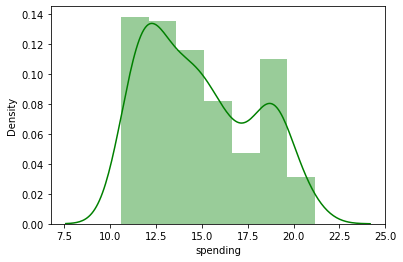

BoxPlot of spending
----------------------------------------------------------------------------


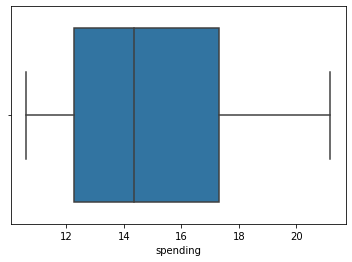

Description of advance_payments
----------------------------------------------------------------------------
count    210.000000
mean      14.559286
std        1.305959
min       12.410000
25%       13.450000
50%       14.320000
75%       15.715000
max       17.250000
Name: advance_payments, dtype: float64 Distribution of advance_payments
----------------------------------------------------------------------------


C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


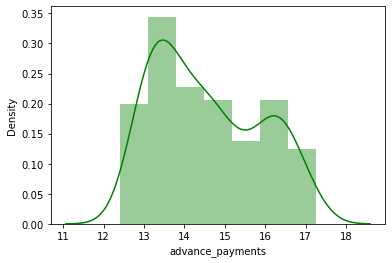

BoxPlot of advance_payments
----------------------------------------------------------------------------


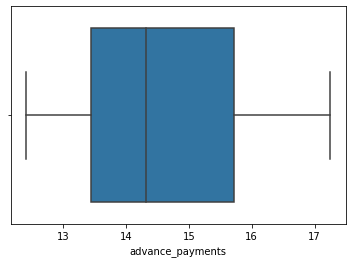

C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of probability_of_full_payment
----------------------------------------------------------------------------
count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64 Distribution of probability_of_full_payment
----------------------------------------------------------------------------


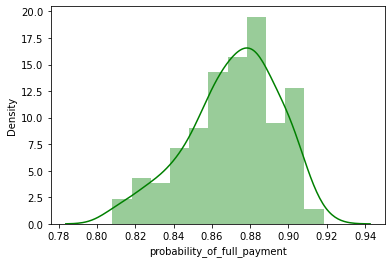

BoxPlot of probability_of_full_payment
----------------------------------------------------------------------------


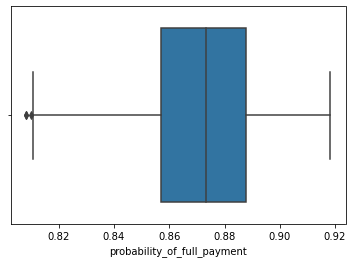

Description of current_balance
----------------------------------------------------------------------------
count    210.000000
mean       5.628533
std        0.443063
min        4.899000
25%        5.262250
50%        5.523500
75%        5.979750
max        6.675000
Name: current_balance, dtype: float64 Distribution of current_balance
----------------------------------------------------------------------------


C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


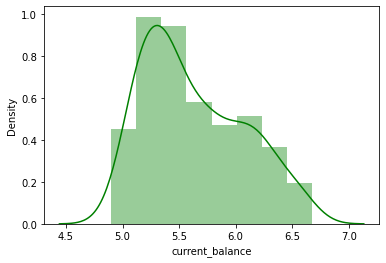

BoxPlot of current_balance
----------------------------------------------------------------------------


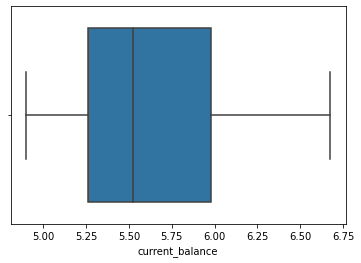

C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of credit_limit
----------------------------------------------------------------------------
count    210.000000
mean       3.258605
std        0.377714
min        2.630000
25%        2.944000
50%        3.237000
75%        3.561750
max        4.033000
Name: credit_limit, dtype: float64 Distribution of credit_limit
----------------------------------------------------------------------------


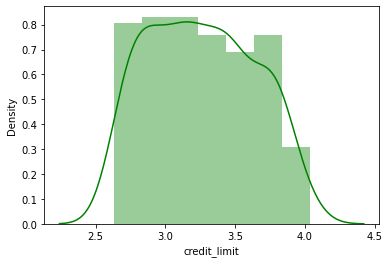

BoxPlot of credit_limit
----------------------------------------------------------------------------


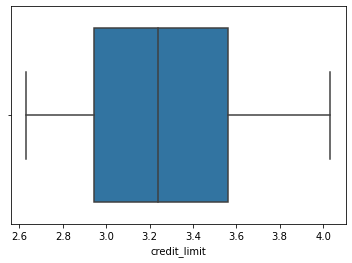

Description of min_payment_amt
----------------------------------------------------------------------------
count    210.000000
mean       3.700201
std        1.503557
min        0.765100
25%        2.561500
50%        3.599000
75%        4.768750
max        8.456000
Name: min_payment_amt, dtype: float64 Distribution of min_payment_amt
----------------------------------------------------------------------------


C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


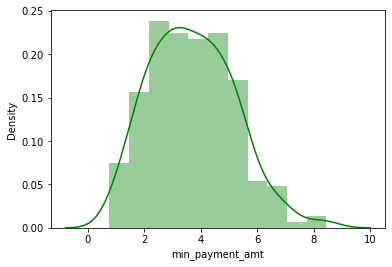

BoxPlot of min_payment_amt
----------------------------------------------------------------------------


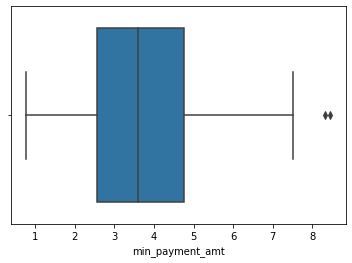

Description of max_spent_in_single_shopping
----------------------------------------------------------------------------
count    210.000000
mean       5.408071
std        0.491480
min        4.519000
25%        5.045000
50%        5.223000
75%        5.877000
max        6.550000
Name: max_spent_in_single_shopping, dtype: float64 Distribution of max_spent_in_single_shopping
----------------------------------------------------------------------------


C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


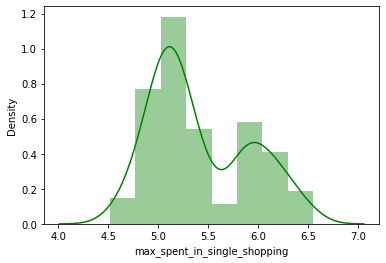

BoxPlot of max_spent_in_single_shopping
----------------------------------------------------------------------------


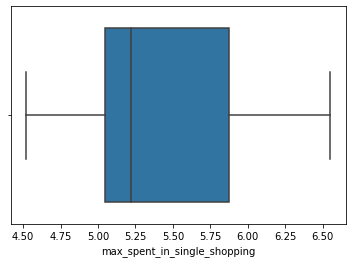

In [11]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [12]:
df.skew().sort_values(ascending=False)

max_spent_in_single_shopping    0.561897
current_balance                 0.525482
min_payment_amt                 0.401667
spending                        0.399889
advance_payments                0.386573
credit_limit                    0.134378
probability_of_full_payment    -0.537954
dtype: float64

## Observations:
1) Outliers present in "probability_of_full_payment" & "min_payment_amt" .

2) "probability_of_full_payment" is left skewed. 

3) Other variables are right skewed. 


## Multivariate Analysis

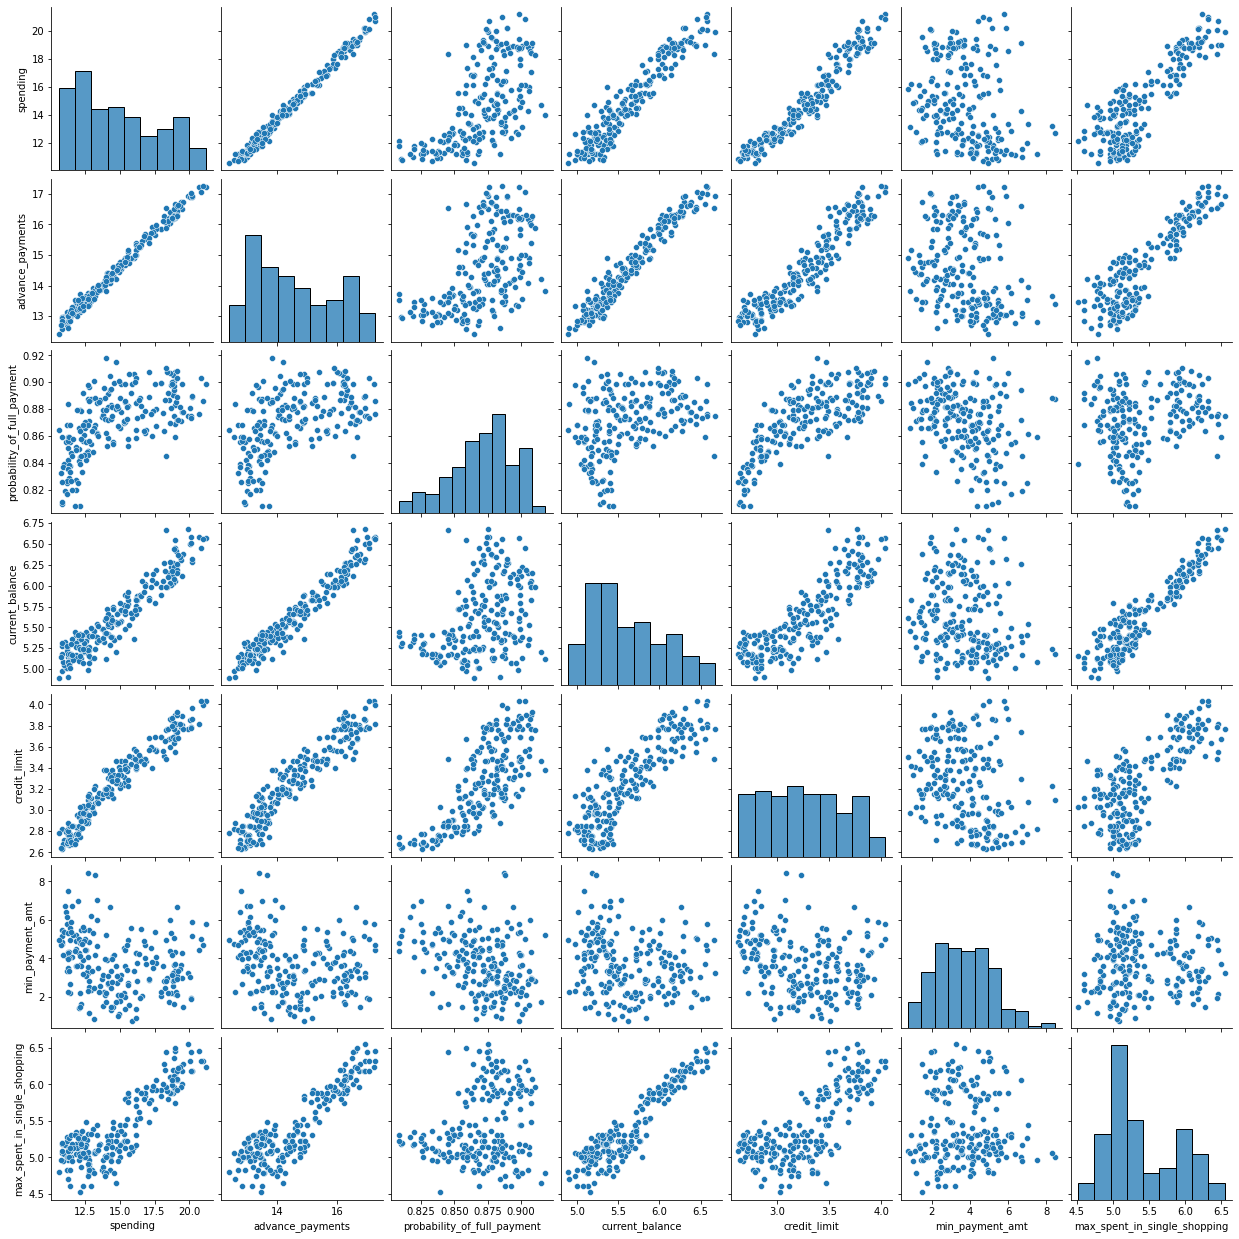

In [13]:
sns.pairplot(df)
plt.show()

In [14]:
corr = df_num.corr(method='pearson')

C:\Users\212548~1\AppData\Local\Temp/ipykernel_15176/1118575991.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


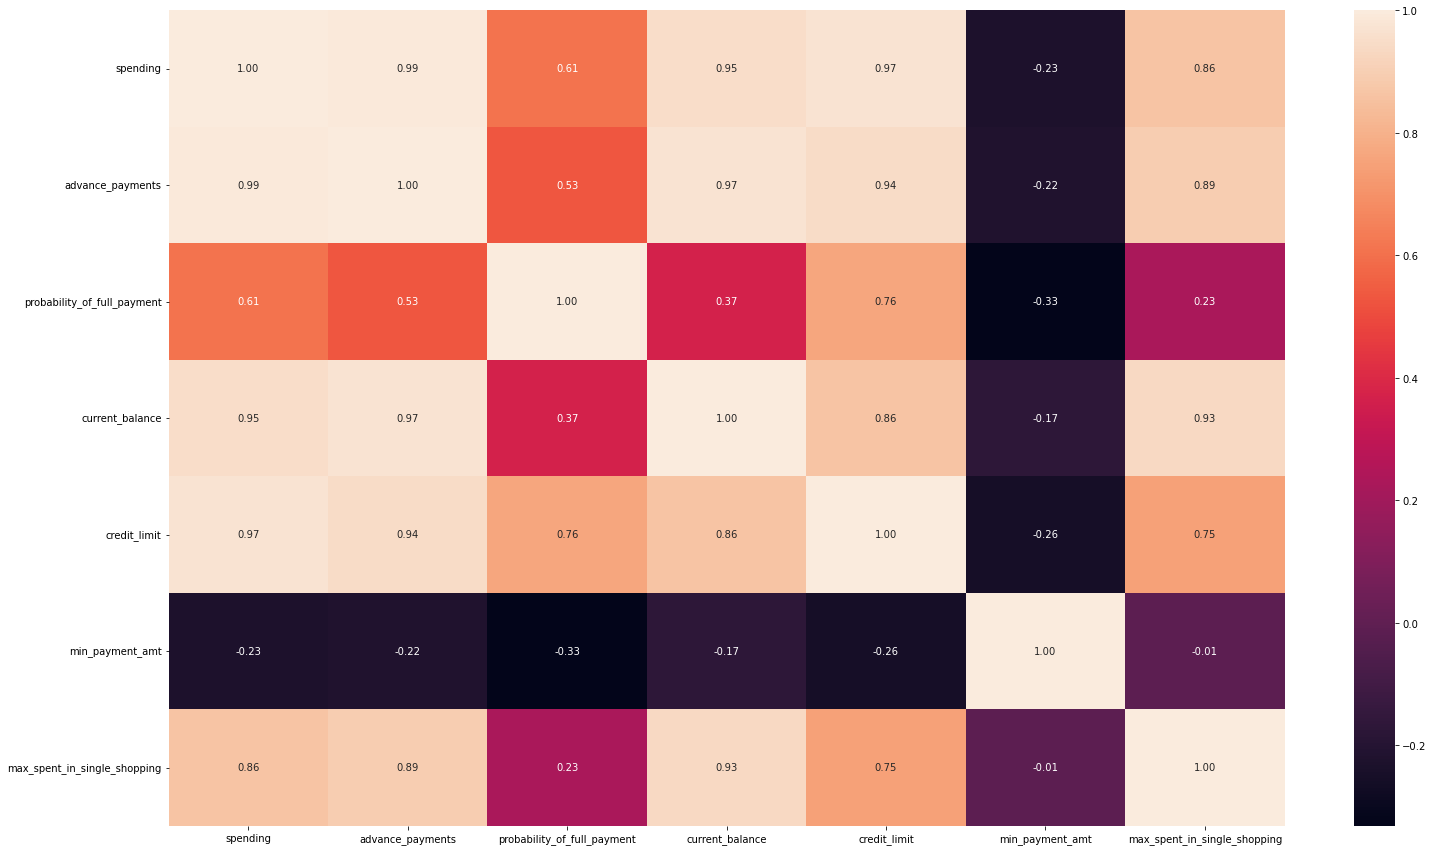

In [15]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f')
plt.show()

In [16]:
# Let us see the significant correlation either negative or positive among independent attributes..
c = df.corr().abs() # Since there may be positive as well as -ve correlation
s = c.unstack() # 
so = s.sort_values(ascending=False) # Sorting according to the correlation
so=so[(so<1) & (so>0.5)].drop_duplicates().to_frame() # Due to symmetry.. dropping duplicate entries.
so.columns = ['correlation']
so

correlation
advance_payments             spending                         0.994341
                             current_balance                  0.972422
credit_limit                 spending                         0.970771
current_balance              spending                         0.949985
advance_payments             credit_limit                     0.944829
max_spent_in_single_shopping current_balance                  0.932806
advance_payments             max_spent_in_single_shopping     0.890784
spending                     max_spent_in_single_shopping     0.863693
current_balance              credit_limit                     0.860415
probability_of_full_payment  credit_limit                     0.761635
max_spent_in_single_shopping credit_limit                     0.749131
spending                     probability_of_full_payment      0.608288
advance_payments             probability_of_full_payment      0.529244

### Observation

Observations:

Strong positive correlation between 
- advance_payments & spending, 
- advance_payments & current_balance, 
- credit_limit & spending
- current_balance & spending
- advance_payments & credit_limit
- max_spent_in_single_shopping &  current_balance



<AxesSubplot:>

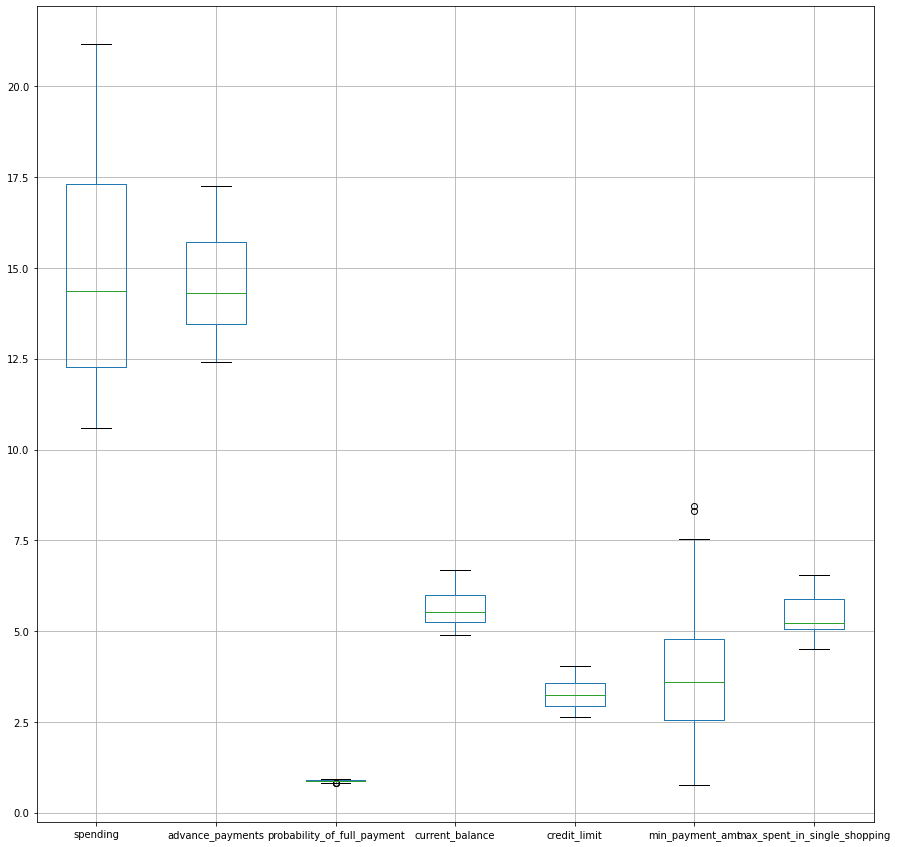

In [17]:
plt.figure(figsize=(15,15))
df[['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping']].boxplot()

## Remove outliers

In [18]:
# Complete the function to calculate lower_range and upper_range
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [19]:
for feature in df[['probability_of_full_payment', 'min_payment_amt']]: 
    lr,ur=treat_outlier(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])

<AxesSubplot:>

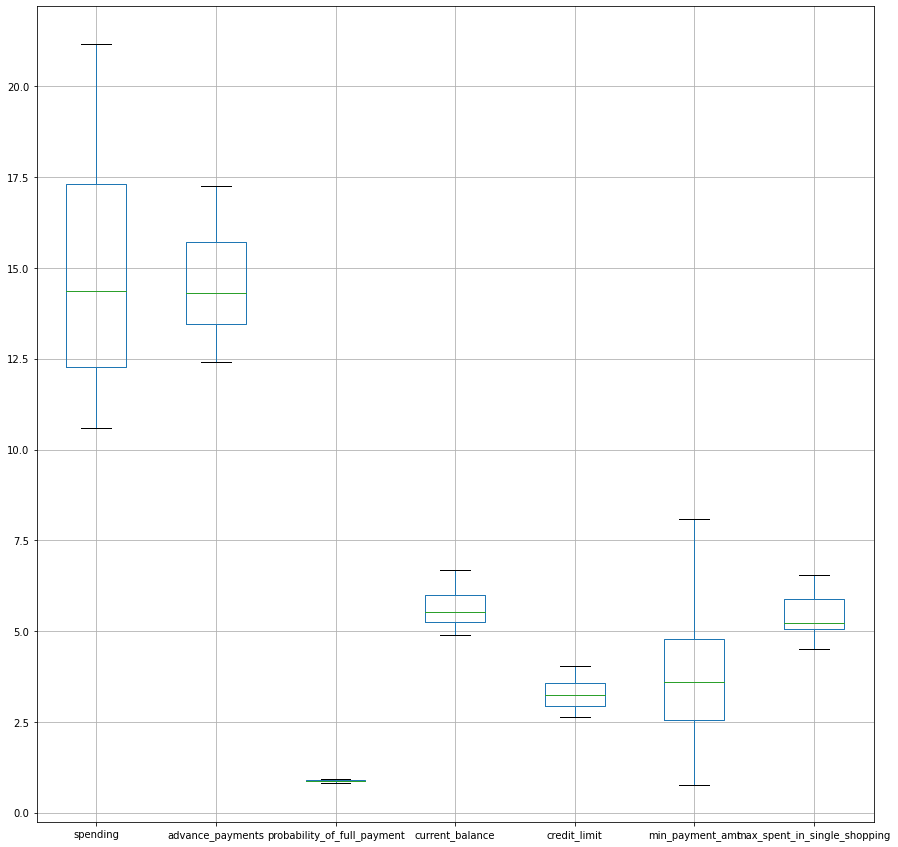

In [20]:
plt.figure(figsize=(15,15))
df[['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping']].boxplot()

There are no outliers after treating them

1.2 Do you think scaling is necessary for clustering in this case? Justify

Standardization or scaling is an important aspect of data pre-processing.Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms. All machine learning
algorithms are dependent on the scaling of data. for clustering too, scaling is
usually applied.In this case we can see that variables are in 100s, 1000s and 10000s.Since the data in these variables are of different scales, it is tough to compare these variables.In this method, we convert variables with different scales of measurements into a single scale.Scaling normalizes the data using the formula (x-mean)/standard deviation. Standard deviation becomes 1 and mean becomes zero.


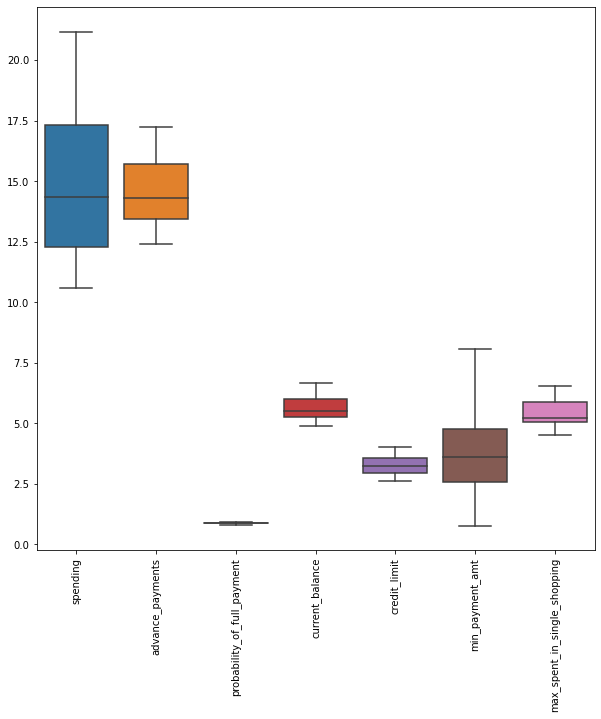

In [21]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.xticks(rotation =90)
plt.show()

In [22]:
# Creating an object for the StandardScaler function
X = StandardScaler()

In [23]:
scaled_df = pd.DataFrame(X.fit_transform(df), columns=df.columns)
scaled_df

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813
...,...,...,...,...,...,...,...
205,-0.329866,-0.413929,0.722220,-0.428801,-0.158181,0.193620,-1.366631
206,0.662292,0.814152,-0.307399,0.675253,0.476084,0.819993,0.789153
207,-0.281636,-0.306472,0.364831,-0.431064,-0.152873,-1.328049,-0.830235
208,0.438367,0.338271,1.232775,0.182048,0.600814,-0.957188,0.071238


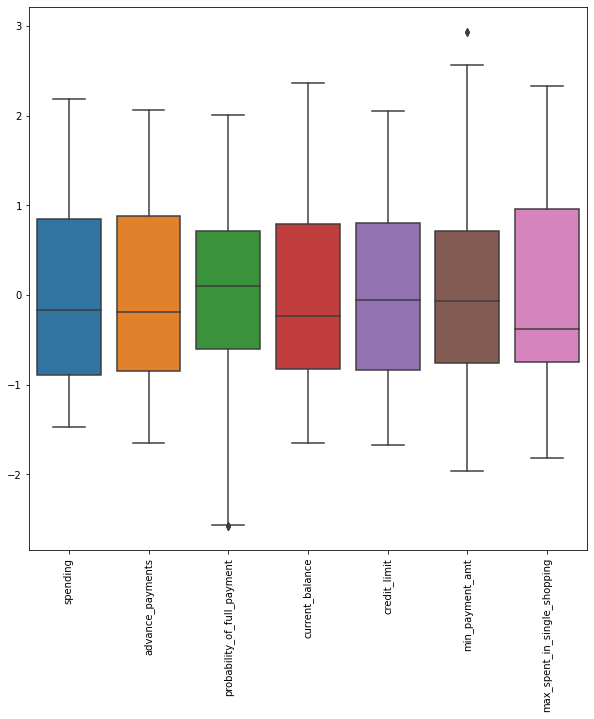

In [24]:
plt.figure(figsize=(10,10))
sns.boxplot(data=scaled_df)
plt.xticks(rotation =90)
plt.show()

1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them.

# Creating the Dendrogram
### Importing dendrogram and linkage module

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Choosing average linkage method

In [26]:
link_method = linkage(scaled_df, method = 'average')

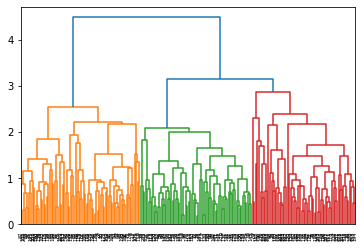

In [27]:
dend = dendrogram(link_method)

### Cutting the Dendrogram with suitable clusters

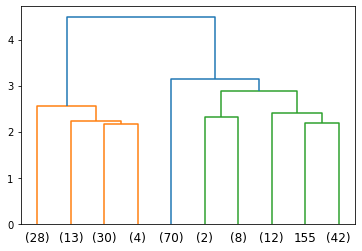

In [28]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 10, 
                 )

# Importing fcluster module to create clusters

In [29]:
from scipy.cluster.hierarchy import fcluster

In [30]:
# Set criterion as maxclust,then create 3 clusters, and store the result in another object 'clusters'

clusters_hier = fcluster(link_method, 3, criterion='maxclust')
clusters_hier

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

Appending clusters to original dataset

In [31]:
df['clusters'] = clusters_hier

In [32]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


### Cluster Frequency

In [33]:
df.clusters.value_counts().sort_index()

1    75
2    70
3    65
Name: clusters, dtype: int64

# Cluster Profiles

In [34]:
aggdata=df.groupby('clusters').mean()
aggdata['Freq']=df.clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846845,5.258300,2.846000,4.619000,5.115071,70
3,14.217077,14.195846,0.884869,5.442000,3.253508,2.759007,5.055569,65


Observation: 
Cluster grouping based on the dendrogram, 3 looks good. 
- Cluster 1: High spending customer
- Cluster 2: Low spending customer
- Cluster 3: Moderate spending customer


1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [35]:
scaled_df1 = scaled_df

In [36]:
from sklearn.cluster import KMeans 
k_means = KMeans(n_clusters = 2)


In [37]:
k_means.fit(scaled_df1)

C:\Users\212548638\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [38]:
k_means.labels_

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [39]:
k_means.inertia_

659.1474009548499

In [40]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df1)
k_means.inertia_

C:\Users\212548638\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


430.298481751223

In [41]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df1)
k_means.inertia_

C:\Users\212548638\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


370.85036341470936

In [42]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_df1)
k_means.inertia_

C:\Users\212548638\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1469.9999999999998

In [43]:
wss =[] 

In [44]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df1)
    wss.append(KM.inertia_)

C:\Users\212548638\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\212548638\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\212548638\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\212548638\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memor

In [45]:
wss

[1469.9999999999998,
 659.1474009548499,
 430.298481751223,
 370.86859623942064,
 327.806115686082,
 289.5651747155914,
 262.3391001343727,
 241.83321664619976,
 221.88793882833676,
 204.13636183454582]

In [46]:
K=[1,2,3,4,5,6,7,8,9,10]

C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

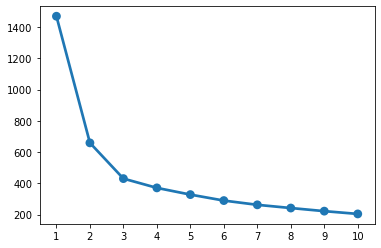

In [47]:
sns.pointplot(K, wss)

# KMeans with K=3

In [48]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df1)
labels = k_means.labels_

C:\Users\212548638\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [49]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [50]:
# Calculating silhouette_score
silhouette_score(scaled_df1,labels, random_state=1)

0.4008059221522216

# KMeans with K=4

In [51]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df1)
labels = k_means.labels_

C:\Users\212548638\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [52]:
# Calculating silhouette_score
silhouette_score(scaled_df1,labels, random_state=1)

0.32943733699973826

In [53]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df1)
labels = k_means.labels_

C:\Users\212548638\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


silhouette score is better for 3 clusters than for 4 clusters. So, final clusters will be 3

Appending Clusters to the original dataset

In [54]:
df["Clus_kmeans"] = labels
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Clus_kmeans
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,0
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,0
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2,1
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,0


# Cluster Profiling

In [55]:
df.Clus_kmeans.value_counts().sort_index()

0    67
1    72
2    71
Name: Clus_kmeans, dtype: int64

In [56]:
clust_profile = df.drop(["clusters"],axis=1)
clust_profile=clust_profile.groupby('Clus_kmeans').mean()
clust_profile['freq']=df.Clus_kmeans.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
Clus_kmeans,,,,,,,,
0,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,67
1,11.856944,13.247778,0.848330,5.231750,2.849542,4.733892,5.101722,72
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,71


1.5  Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.


Cluster 0 : High Spending Group

- Giving any reward points might increase their purchases.
- maximum max_spent_in_single_shopping is high for this group, so can be offered discount/offer on next transactions upon full payment
- Increase there credit limit and 
- Increase spending habits
- Give loan against the credit card, as they are customers with good repayment record.
- Tie up with luxary brands, which will drive more one_time_maximun spending

Cluster 2 : Moderate Spending Group

- They are potential target customers who are paying bills and doing purchases and maintaining comparatively good credit score. So we can increase credit limit or can lower down interest rate. 
- Promote premium cards/loyality cars to increase transcations.
- Increase spending habits by trying with premium ecommerce sites, travel portal, travel airlines/hotel, as this will encourge them to spend more

Cluster 1 : Low Spending Group

- customers should be given remainders for payments. Offers can be provided on early payments to improve their payment rate.
- Increase there spending habits by tieing up with grocery stores, utlities (electircity, phone, gas, others)



## Problem 2 : CART- RF - ANN
An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Us
e CART, RF & ANN and compare the models' performances in train and test sets.



## Attribute Information:
1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration in days)
7. Destination of the tour (Destination)
8. Amount worth of sales per customer in procuring tour insurance policies in rupees (in 100’s)
9. The commission received for tour insurance firm (Commission is in percentage of sales)
10.Age of insured (Age)


2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [57]:
df1 = pd.read_csv("C:/Users/212548638/Desktop/GL/Project 3 DM/PROJECT/insurance_part2_data.csv")

In [58]:
df1.head()


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product_Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [59]:
df1.tail()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product_Name,Destination
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


In [60]:
df1.shape

(3000, 10)

In [61]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product_Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [62]:
df1.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product_Name    0
Destination     0
dtype: int64

### Geting unique counts of all Objects

In [63]:
print('Agency_Code \n',df1.Agency_Code.value_counts())
print('\n')
print('Type \n',df1.Type.value_counts())
print('\n')
print('Claimed \n',df1.Claimed.value_counts())
print('\n')
print('Channel \n',df1.Channel.value_counts())
print('\n')
print('Destination \n',df1.Destination.value_counts())
print('\n')
print('Product Name \n',df1.Product_Name.value_counts())

Agency_Code 
 EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64


Type 
 Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64


Claimed 
 No     2076
Yes     924
Name: Claimed, dtype: int64


Channel 
 Online     2954
Offline      46
Name: Channel, dtype: int64


Destination 
 ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64


Product Name 
 Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product_Name, dtype: int64


In [64]:
df1.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product_Name    0
Destination     0
dtype: int64

Observatiom

- 10 variables
- Age, Commision, Duration, Sales are numeric variable & rest are categorial variables
- 3000 records, no missing one
- 9 independant variable and one target variable - Clamied

In [65]:
df1.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product_Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- duration has negative value, it is not possible. Wrong entry.
- Commision & Sales- mean and median varies signficantly

In [66]:
df1["Duration"].sort_values(ascending = True)

1508      -1
1746       0
2628       0
424        1
1430       1
        ... 
873      428
1398     431
2260     434
2914     466
2845    4580
Name: Duration, Length: 3000, dtype: int64

In [67]:
# Duration of tour can not be 0 or -1
# Replacing Duration of tour with minimum possible value that is 1.
df1["Duration"] = np.where(df1["Duration"]<=0, 1,df1["Duration"] )


In [68]:
df1["Duration"].sort_values(ascending = True)

424        1
1430       1
1875       1
775        1
987        1
        ... 
873      428
1398     431
2260     434
2914     466
2845    4580
Name: Duration, Length: 3000, dtype: int64

In [69]:
df1.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.002667,134.052619,1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product_Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
df1.duplicated().sum()

139

In [71]:
duplicate = df1[df1.duplicated()]
duplicate

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product_Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


#df1.drop_duplicates(inplace=True)

As the customer ID are not available, the duplicates are really duplicates can not be verified.
Also removing duplicate is resulting in overfitting of model.
Therfore decsion is to keep duplicates

# EDA 


Proportion of observations in Target classes

In [72]:
# Get the proportions
df1.Claimed.value_counts(normalize=True)

No     0.692
Yes    0.308
Name: Claimed, dtype: float64

C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


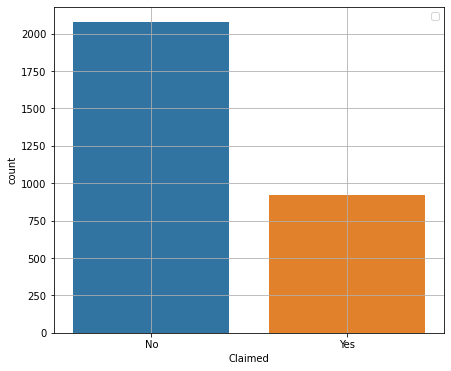

In [73]:
plt.figure(figsize=(7,6))
sns.countplot(df1.Claimed)
plt.legend()
plt.grid()
plt.show()


The target variables is unbalanced type as we almost 50% yes compared to No

In [74]:
## Univariate Analysis

<AxesSubplot:>

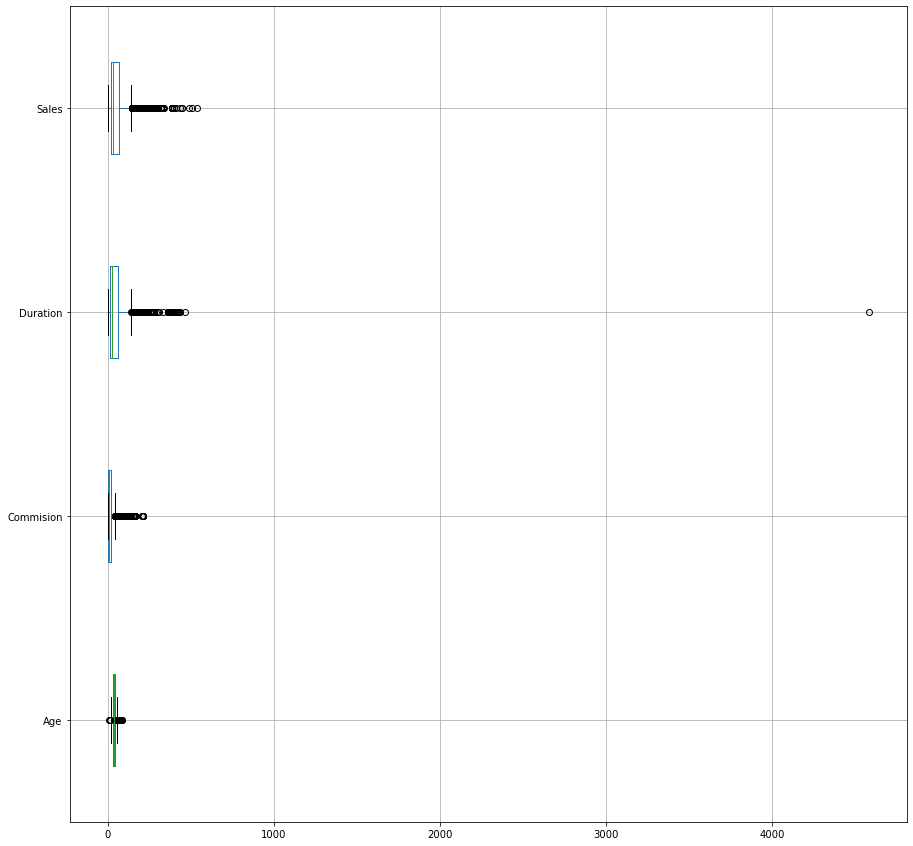

In [75]:
# construct box plot for continuous variables
plt.figure(figsize=(15,15))
df1[['Age', 'Commision', 'Duration', 'Sales']].boxplot(vert=0)

Outliers exists for every variables, and also has many outliers.

### Treating the Outliers

In [76]:
# Complete the function to calculate lower_range and upper_range
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [77]:
for feature in df1[['Age', 'Commision', 'Duration', 'Sales']]: 
    lr,ur=treat_outlier(df1[feature])
    df1[feature]=np.where(df1[feature]>ur,ur,df1[feature])
    df1[feature]=np.where(df1[feature]<lr,lr,df1[feature])

<AxesSubplot:>

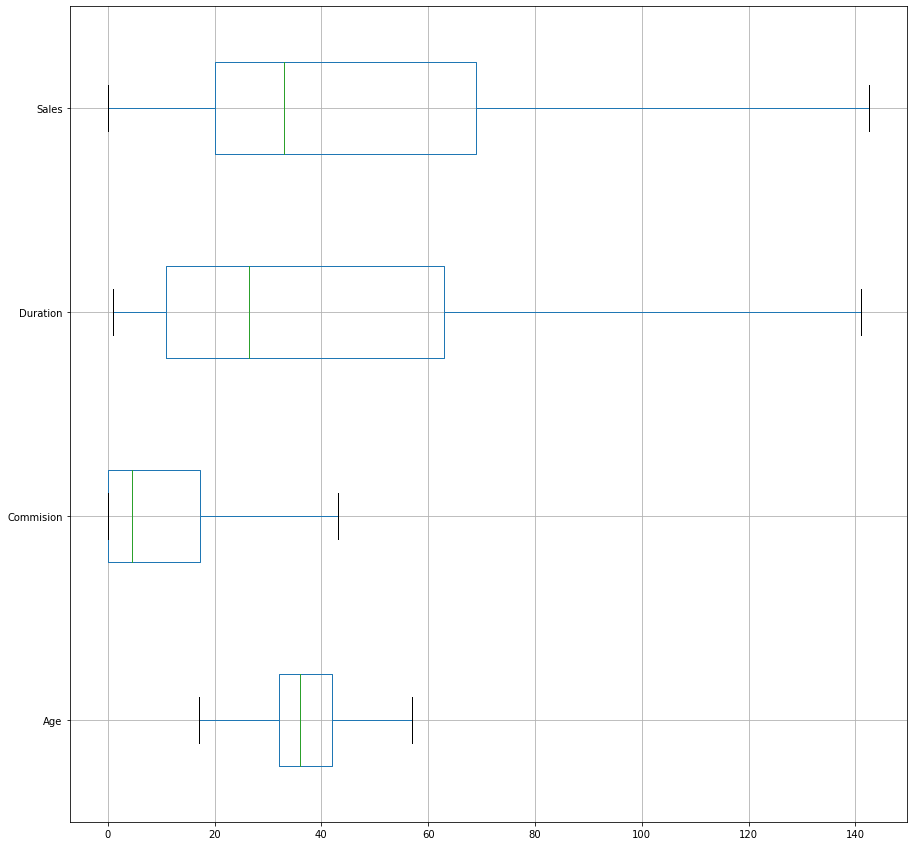

In [78]:

plt.figure(figsize=(15,15))
df1[['Age', 'Commision', 'Duration', 'Sales']].boxplot(vert=0)

There are no outliers after treating them

## Multivariate Analysis

### Checking pairwise distribution of the continuous variables

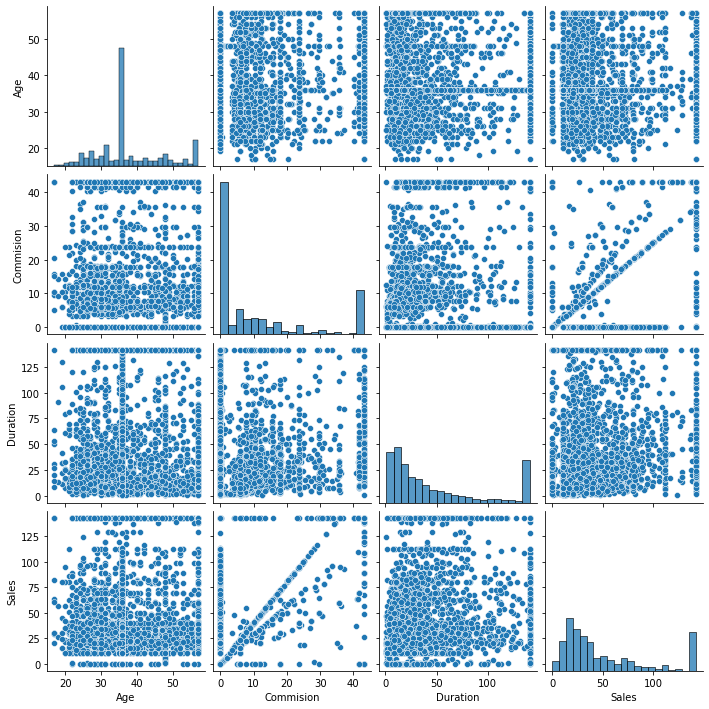

In [79]:
sns.pairplot(df1[['Age', 'Commision', 'Duration', 'Sales']])

<AxesSubplot:>

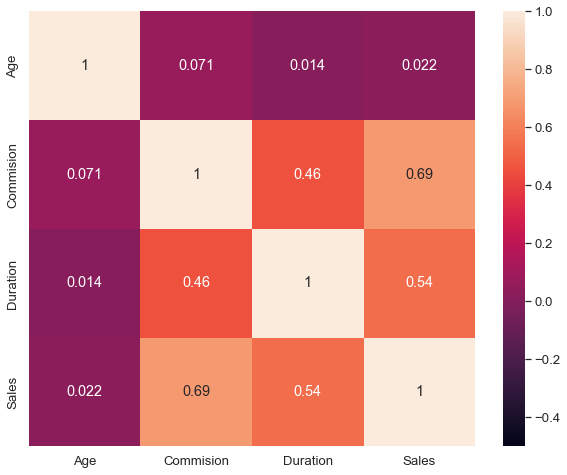

In [80]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df1[['Age', 'Commision', 'Duration', 'Sales']].corr(), annot=True,vmin=-0.5,vmax=1)

In [81]:
# Let us see the significant correlation either negative or positive among independent attributes..
c = df1.corr().abs() # Since there may be positive as well as -ve correlation
s = c.unstack() # 
so = s.sort_values(ascending=False) # Sorting according to the correlation
so=so[(so<1) & (so>0.5)].drop_duplicates().to_frame() # Due to symmetry.. dropping duplicate entries.
so.columns = ['correlation']
so

,,correlation
Commision,Sales,0.686219
Duration,Sales,0.542824


There seems to be a clear correlation between Sales and commision.
Correlation also exist between 
- Commision and Duration
- Sales and Duration



In [82]:
df1.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product_Name,Destination
0,48.0,C2B,Airlines,No,0.70,Online,7.0,2.51,Customised Plan,ASIA
1,36.0,EPX,Travel Agency,No,0.00,Online,34.0,20.00,Customised Plan,ASIA
2,39.0,CWT,Travel Agency,No,5.94,Online,3.0,9.90,Customised Plan,Americas
3,36.0,EPX,Travel Agency,No,0.00,Online,4.0,26.00,Cancellation Plan,ASIA
4,33.0,JZI,Airlines,No,6.30,Online,53.0,18.00,Bronze Plan,ASIA


Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
The following code loops through each column and checks if the column type is object then converts those columns into  categorical with each distinct value becoming a category or code.

In [83]:
for feature in df1.columns: 
    if df1[feature].dtype == 'object':
        df1[feature] = pd.Categorical(df1[feature]).codes 

In [84]:
df1.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product_Name,Destination
0,48.0,0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0,0.00,1,34.0,20.00,2,0
2,39.0,1,1,0,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0,0.00,1,4.0,26.00,1,0
4,33.0,3,0,0,6.30,1,53.0,18.00,0,0


In [85]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   float64
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   float64
 7   Sales         3000 non-null   float64
 8   Product_Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(4), int8(6)
memory usage: 111.5 KB


In [86]:
print('Agency_Code \n',df1.Agency_Code.value_counts())
print('\n')
print('Type \n',df1.Type.value_counts())
print('\n')
print('Claimed \n',df1.Claimed.value_counts())
print('\n')
print('Channel \n',df1.Channel.value_counts())
print('\n')
print('Destination \n',df1.Destination.value_counts())
print('\n')
print('Product Name \n',df1.Product_Name.value_counts())

Agency_Code 
 2    1365
0     924
1     472
3     239
Name: Agency_Code, dtype: int64


Type 
 1    1837
0    1163
Name: Type, dtype: int64


Claimed 
 0    2076
1     924
Name: Claimed, dtype: int64


Channel 
 1    2954
0      46
Name: Channel, dtype: int64


Destination 
 0    2465
1     320
2     215
Name: Destination, dtype: int64


Product Name 
 2    1136
1     678
0     650
4     427
3     109
Name: Product_Name, dtype: int64


Label Encoding has been done and all columns are converted to number

C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

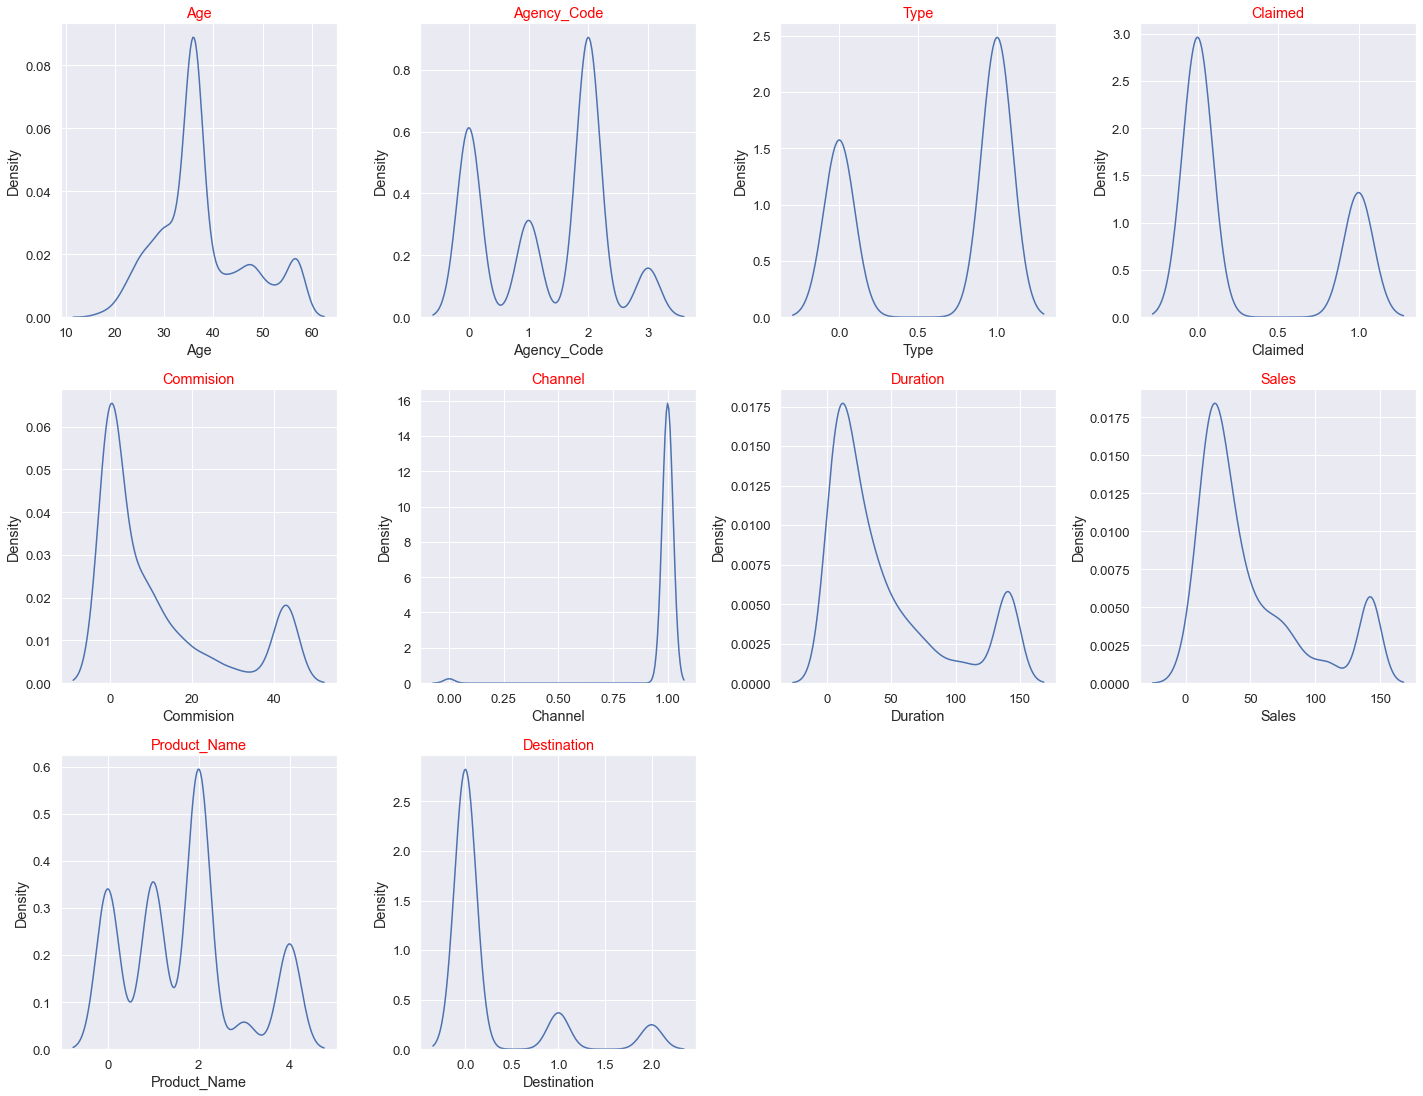

In [87]:
data_plot=df1
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.distplot(data_plot[data_plot.columns[i]],hist=False)
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()
plt.show()



In [88]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,37.573333,9.096567,17.0,32.0,36.00,42.000,57.0000
Agency_Code,3000.0,1.306333,0.994060,0.0,0.0,2.00,2.000,3.0000
Type,3000.0,0.612333,0.487299,0.0,0.0,1.00,1.000,1.0000
Claimed,3000.0,0.308000,0.461744,0.0,0.0,0.00,1.000,1.0000
Commision,3000.0,11.157202,15.025889,0.0,0.0,4.63,17.235,43.0875
Channel,3000.0,0.984667,0.122895,0.0,1.0,1.00,1.000,1.0000
Duration,3000.0,45.177000,45.449352,1.0,11.0,26.50,63.000,141.0000
Sales,3000.0,49.810497,42.214752,0.0,20.0,33.00,69.000,142.5000
Product_Name,3000.0,1.661667,1.258726,0.0,1.0,2.00,2.000,4.0000
Destination,3000.0,0.250000,0.575277,0.0,0.0,0.00,0.000,2.0000


2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network
2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

### Extracting the target column into separate vectors for training set and test set

In [89]:
X = df1.drop('Claimed',axis=1)
y = df1.pop('Claimed')

In [90]:
X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product_Name,Destination
0,48.0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0.00,1,34.0,20.00,2,0
2,39.0,1,1,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0.00,1,4.0,26.00,1,0
4,33.0,3,0,6.30,1,53.0,18.00,0,0


In [91]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Claimed, dtype: int8

### Splitting data into training and test set into 30% test data

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [93]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('Total Obs',2100+900)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)
Total Obs 3000


### Building a Decision Tree Classifier -CART

In [94]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)


In [95]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=1)

In [96]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()


The above code will save a .dot file in your working directory.
WebGraphviz is Graphviz in the Browser.
Copy paste the contents of the file into the link below to get the visualization
http://webgraphviz.com/


### Feature Importance

In [97]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))


                   Imp
Duration      0.240804
Sales         0.223446
Agency_Code   0.203293
Age           0.182107
Commision     0.072570
Product_Name  0.043855
Destination   0.023909
Channel       0.007948
Type          0.002067


C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


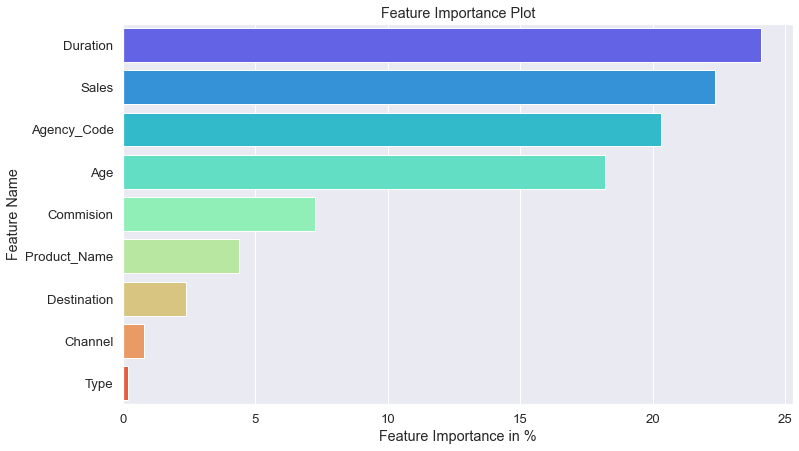

In [98]:
x=pd.DataFrame(dt_model.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()



### Predicting Test Data

In [99]:
y_predict = dt_model.predict(X_test)

In [100]:
y_predict.shape

(900,)

# Regularising the Decision Tree

### Adding Tuning Parameters

In [101]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [8,9,10],
    'min_samples_leaf': [15,20,25],
    'min_samples_split': [45,60,75]
}

dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)

In [102]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [8, 9, 10],
                         'min_samples_leaf': [15, 20, 25],
                         'min_samples_split': [45, 60, 75]})

In [103]:
grid_search.best_params_

{'max_depth': 8, 'min_samples_leaf': 25, 'min_samples_split': 60}

In [104]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 8,min_samples_leaf=25,min_samples_split=60,random_state=1)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=25, min_samples_split=60,
                       random_state=1)

### Generating New Tree

In [105]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

### Variable Importance

In [106]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.545688
Sales         0.252360
Product_Name  0.068850
Duration      0.060773
Age           0.051264
Commision     0.021065
Type          0.000000
Channel       0.000000
Destination   0.000000


C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


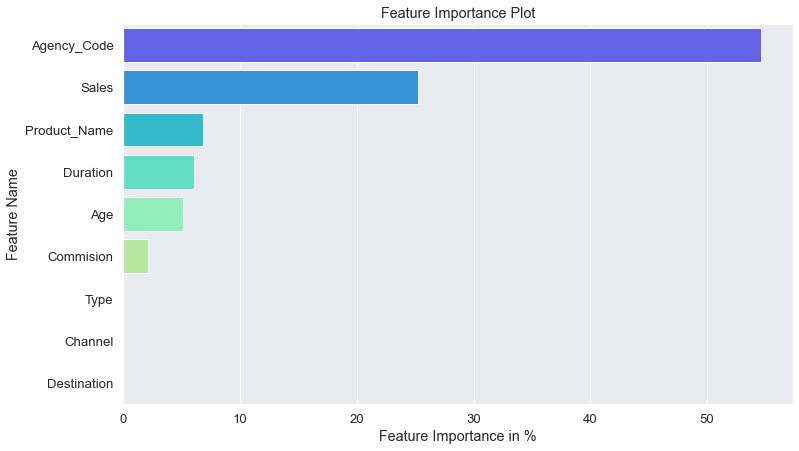

In [107]:
x=pd.DataFrame(reg_dt_model.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()



### Predicting on Training and Test dataset

In [108]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [109]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (2100,)
ytest_predict (900,)


### Getting the Predicted Classes

In [110]:
ytest_predict

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

### Getting the Predicted Probabilities

In [111]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.96666667, 0.03333333],
       [0.55555556, 0.44444444],
       [0.24705882, 0.75294118],
       ...,
       [0.24705882, 0.75294118],
       [0.86486486, 0.13513514],
       [0.9375    , 0.0625    ]])

In [112]:
 pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.966667,0.033333
1,0.555556,0.444444
2,0.247059,0.752941
3,0.130435,0.869565
4,0.935185,0.064815


# Model Evaluation

## Measuring AUC-ROC Curve

### AUC and ROC for the training data

AUC: 0.855


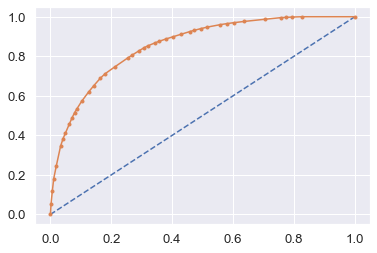

In [113]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### AUC and ROC for the test data

AUC: 0.785


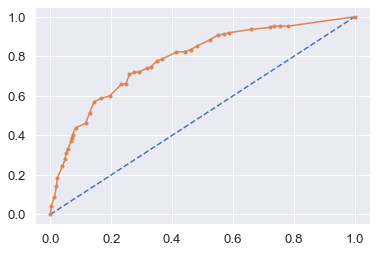

In [114]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Confusion Matrix for the training data

In [115]:
confusion_matrix(train_labels, ytrain_predict)

array([[1320,  151],
       [ 269,  360]], dtype=int64)

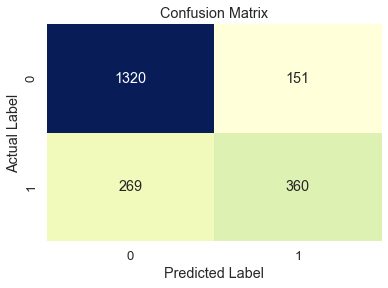

In [116]:
sns.heatmap(confusion_matrix(train_labels, ytrain_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [117]:
#Train Data Accuracy
reg_dt_model.score(X_train,train_labels) 

0.8

In [118]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1471
           1       0.70      0.57      0.63       629

    accuracy                           0.80      2100
   macro avg       0.77      0.73      0.75      2100
weighted avg       0.79      0.80      0.79      2100



## Confusion Matrix for test data

In [119]:
confusion_matrix(test_labels, ytest_predict)

array([[555,  50],
       [166, 129]], dtype=int64)

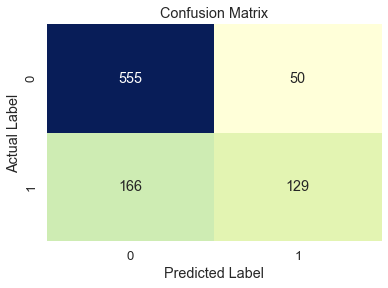

In [120]:
sns.heatmap(confusion_matrix(test_labels, ytest_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [121]:
#Test Data Accuracy
reg_dt_model.score(X_test,test_labels)

0.76

In [122]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       605
           1       0.72      0.44      0.54       295

    accuracy                           0.76       900
   macro avg       0.75      0.68      0.69       900
weighted avg       0.75      0.76      0.74       900



# Ensemble RandomForest Classifier

In [123]:
#### Building the Random Forest model

**Importance of Random State**

**The important thing is that everytime you use any natural number, you will always get the same output the first time you make the model which is similar to random state while train test split**

In [124]:
rfcl = RandomForestClassifier(n_estimators = 501,random_state=123)
rfcl = rfcl.fit(X_train, train_labels)

In [125]:
rfcl

RandomForestClassifier(n_estimators=501, random_state=123)

## Perform Grid Search

### Grid Search for finding out the optimal values for the hyper parameters

In [126]:


from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10,15],
    'max_features': [4,5,6,7],
    'min_samples_leaf': [10,50, 70],
    'min_samples_split': [30,50, 70],
    'n_estimators': [200, 250,300]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)



In [127]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15], 'max_features': [4, 5, 6, 7],
                         'min_samples_leaf': [10, 50, 70],
                         'min_samples_split': [30, 50, 70],
                         'n_estimators': [200, 250, 300]})

### Get best parameters

In [128]:
grid_search.best_params_

{'max_depth': 15,
 'max_features': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 30,
 'n_estimators': 300}

In [129]:
best_grid = grid_search.best_estimator_

In [130]:
best_grid

RandomForestClassifier(max_depth=15, max_features=5, min_samples_leaf=10,
                       min_samples_split=30, n_estimators=300)

### Predict on both train and test sets

In [131]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

### Check Feature Importances

C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


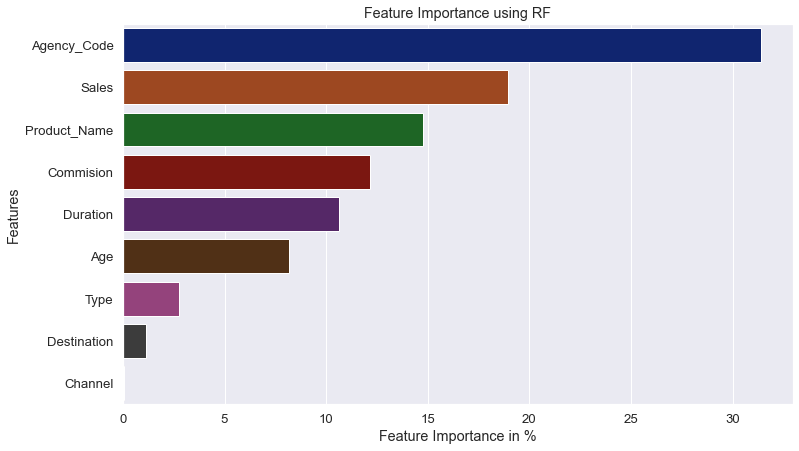

In [132]:
x=pd.DataFrame(best_grid.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF')
plt.show()



In [133]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.313772
Sales         0.189457
Product_Name  0.147803
Commision     0.121517
Duration      0.106087
Age           0.081551
Type          0.027649
Destination   0.011496
Channel       0.000669


### print confusion matrix and classification report

In [134]:
confusion_matrix(train_labels,ytrain_predict)

array([[1348,  123],
       [ 240,  389]], dtype=int64)

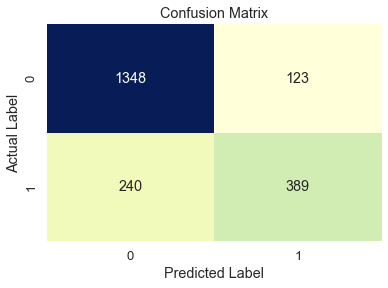

In [135]:
sns.heatmap(confusion_matrix(train_labels, ytrain_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [136]:
confusion_matrix(test_labels,ytest_predict)

array([[558,  47],
       [158, 137]], dtype=int64)

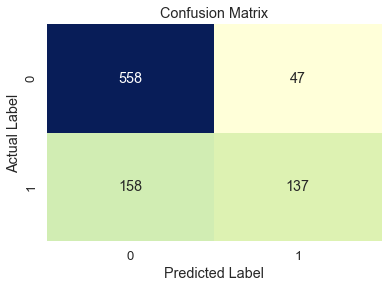

In [137]:
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [138]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1471
           1       0.76      0.62      0.68       629

    accuracy                           0.83      2100
   macro avg       0.80      0.77      0.78      2100
weighted avg       0.82      0.83      0.82      2100



In [139]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       605
           1       0.74      0.46      0.57       295

    accuracy                           0.77       900
   macro avg       0.76      0.69      0.71       900
weighted avg       0.77      0.77      0.76       900



### Plot ROC Curve and print area under the curve

AUC: 0.885


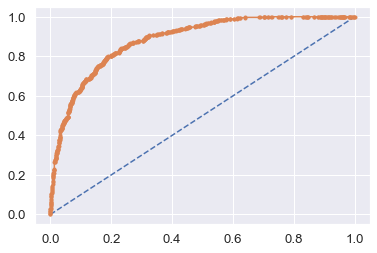

In [140]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.820


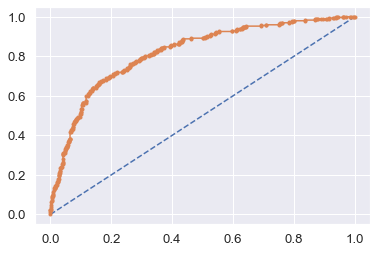

In [141]:
# AUC and ROC for the test data

# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Building Neural Network Model

In [142]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

### Model Tuning through Grid Search

In [151]:
param_grid = {
    'hidden_layer_sizes': [(50,100,200)],
    'solver': ['adam'],
    'tol': [0.01],
    'max_iter' : [2500,3000,4000]
}

mlp = MLPClassifier()

grid_search = GridSearchCV(estimator = mlp, param_grid = param_grid, cv = 3)

In [152]:
grid_search.fit(X_trains, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [(50, 100, 200)],
                         'max_iter': [2500, 3000, 4000], 'solver': ['adam'],
                         'tol': [0.01]})

In [153]:
grid_search.best_params_

{'hidden_layer_sizes': (50, 100, 200),
 'max_iter': 4000,
 'solver': 'adam',
 'tol': 0.01}

In [154]:
best_grid = grid_search.best_estimator_

### Predict on both train and test sets

In [155]:
ytrain_predict = best_grid.predict(X_trains)
ytest_predict = best_grid.predict(X_tests)

### print confusion matrix and classification report

In [156]:
confusion_matrix(train_labels,ytrain_predict)


array([[1331,  140],
       [ 287,  342]], dtype=int64)

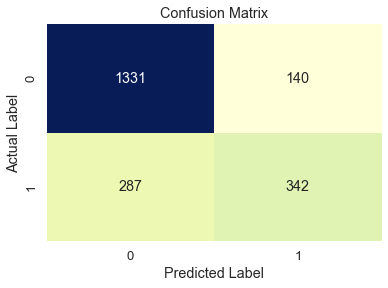

In [157]:
sns.heatmap(confusion_matrix(train_labels, ytrain_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [158]:
confusion_matrix(test_labels,ytest_predict)

array([[556,  49],
       [159, 136]], dtype=int64)

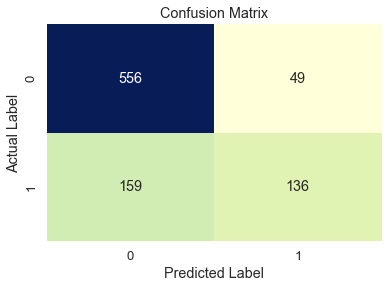

In [159]:
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [160]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1471
           1       0.71      0.54      0.62       629

    accuracy                           0.80      2100
   macro avg       0.77      0.72      0.74      2100
weighted avg       0.79      0.80      0.79      2100



In [161]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       605
           1       0.74      0.46      0.57       295

    accuracy                           0.77       900
   macro avg       0.76      0.69      0.70       900
weighted avg       0.76      0.77      0.75       900



### Plot ROC Curve and print area under the curve

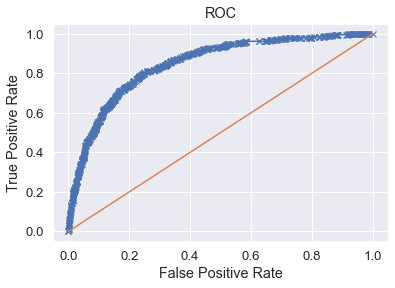

Area under Curve is 0.847646983169037


In [162]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_trains)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels,best_grid.predict_proba(X_trains)[:,1]))

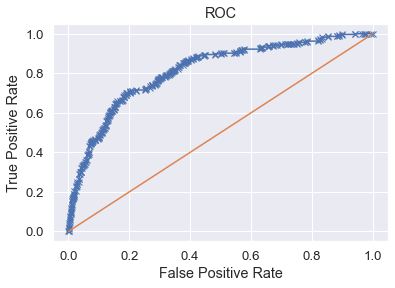

Area under Curve is 0.8135957417005184


In [163]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_tests)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(test_labels,best_grid.predict_proba(X_tests)[:,1]))

## Conclusion

2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations.

For the business problem of Insurance providing firm, three model were analysed i.e. CART, Random forest and ANN  for the predictions. These three models were evaluated on trainig and testing datasets and model performance were analysed.
The Accuracy, Precision and F1 score was computed using classification report. The confusion matrix, AUC_ROC score and ROC plot was computed and compared for different models.
All the models have peroformed well but to increase our accuracy in predictions, we can choose Random forest which creates multiple trees for decision making.
Recommendation & Insights: 

•	More real time unstructured data and past data should be collected in order to have balanced data.
•	As per the data 90% of insurance is done by online channel. Almost all the offline business has a claimed associated, need to find why? 
•	Need to train the JZI agency resources to pick up sales as they are in bottom, need to run promotional marketing campaign or evaluate if we need to tie up with alternate agency 
•	Also based on the model we are getting 80%accuracy, so we need customer books airline tickets or plans, cross sell the insurance based on the claim data pattern. 
•	Other interesting fact is more sales happen via Agency than Airlines and the trend shows the claim are processed more at Airline. So we may need to deep dive into the process to understand the workflow and why?

Key performance indicators (KPI) The KPI’s of insurance claims are: 
•	Reduce claims cycle time 
•	Increase customer satisfaction
•	  Combat fraud 
•	Optimize claims recovery 
•  Reduce claim handling costs Insights gained from data and AI-powered analytics could expand the boundaries of insurability, extend existing products, and give rise to new risk transfer solutions in areas like a non-damage business interruption and reputational damage.
